In [1]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Customers Churn')

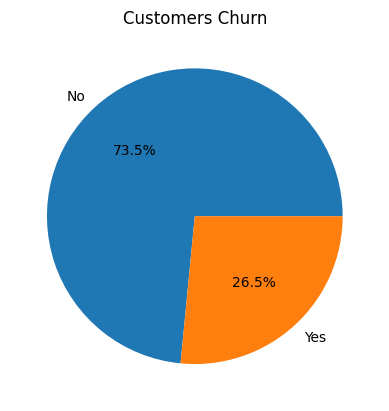

In [8]:
import matplotlib.pyplot as plt
classes_count = df['Churn'].value_counts()


plt.pie(classes_count, labels=['No','Yes'], autopct = '%1.1f%%')
plt.title('Customers Churn')

<Axes: xlabel='tenure', ylabel='Count'>

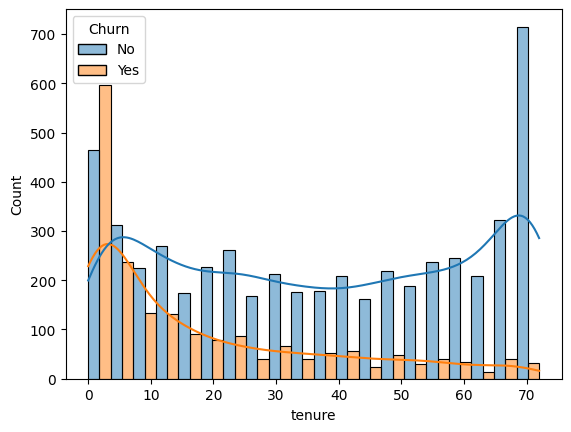

In [9]:
import seaborn as sns
sns.histplot(
    data = df,
    x='tenure',
    hue = 'Churn',
    bins = 20,
    multiple = 'dodge',
    kde = True
)

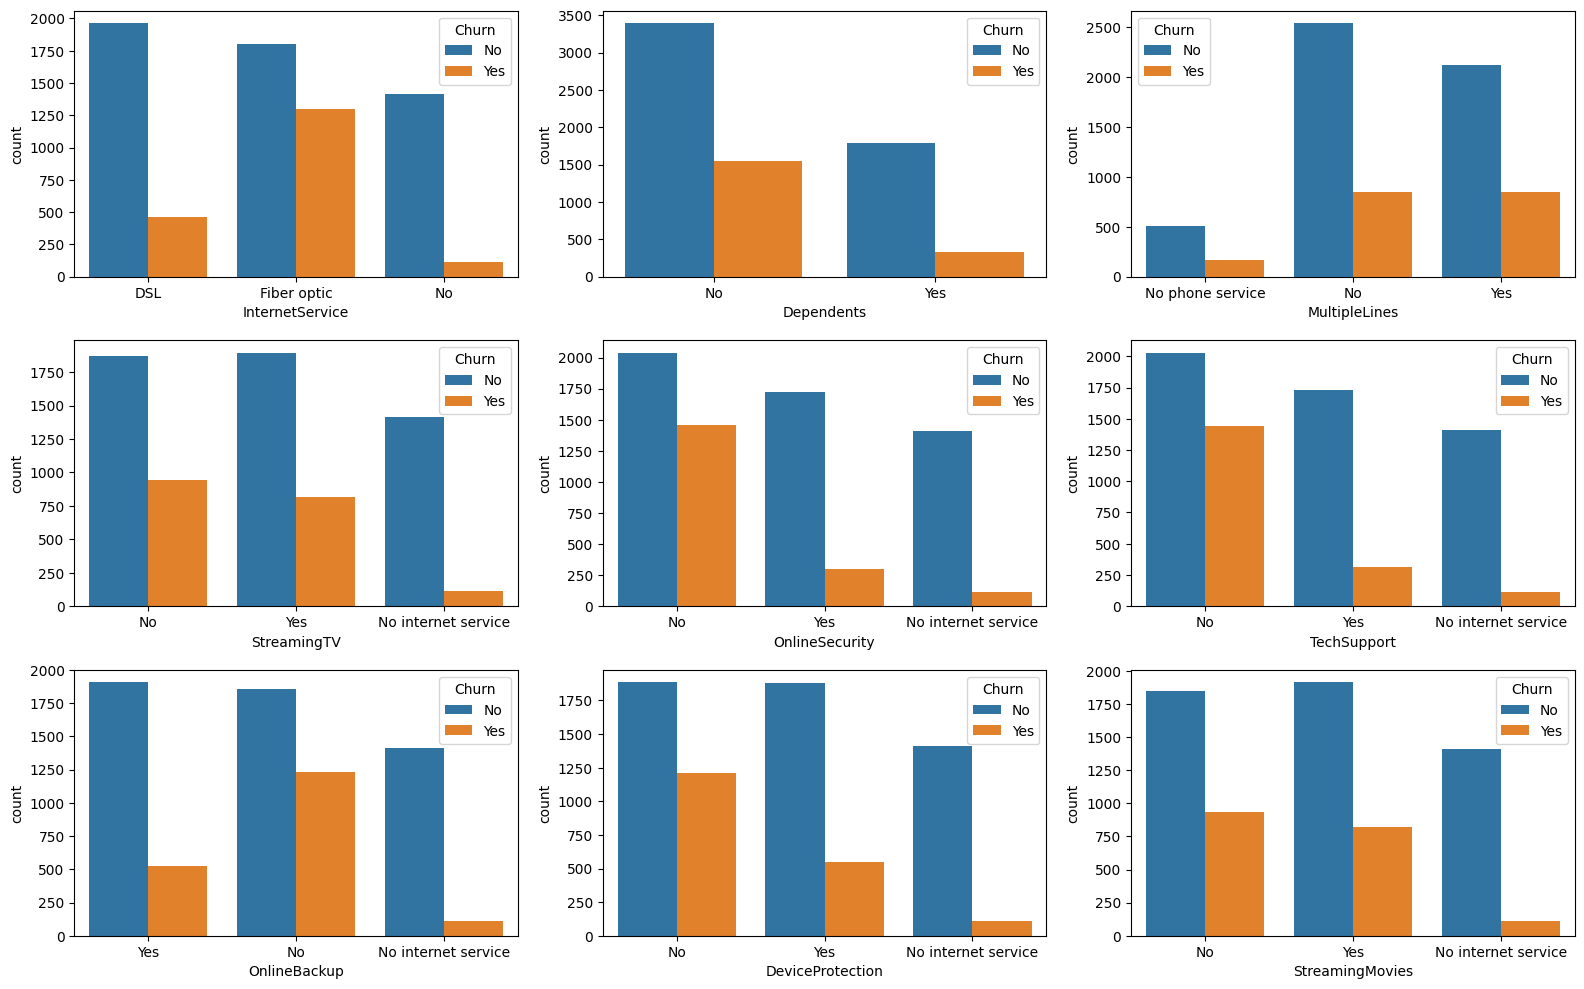

In [10]:
fig,axes = plt.subplots(3,3, figsize=(16, 10))
sns.countplot(ax = axes[0,0], data=df, x="InternetService", hue="Churn")
sns.countplot(ax=axes[0,1], data=df, x="Dependents", hue="Churn")
sns.countplot(ax = axes[0,2], data=df, x="MultipleLines", hue="Churn")
sns.countplot(ax = axes[1,0], data = df, x="StreamingTV", hue="Churn")
sns.countplot(ax = axes[1,1], data = df, x="OnlineSecurity", hue="Churn")
sns.countplot(ax = axes[1,2], data = df, x="TechSupport", hue="Churn")
sns.countplot(ax = axes[2,0], data = df, x="OnlineBackup", hue="Churn")
sns.countplot(ax = axes[2,1], data = df, x="DeviceProtection", hue="Churn")
sns.countplot(ax = axes[2,2], data = df, x="StreamingMovies", hue="Churn")
plt.tight_layout()
plt.show()

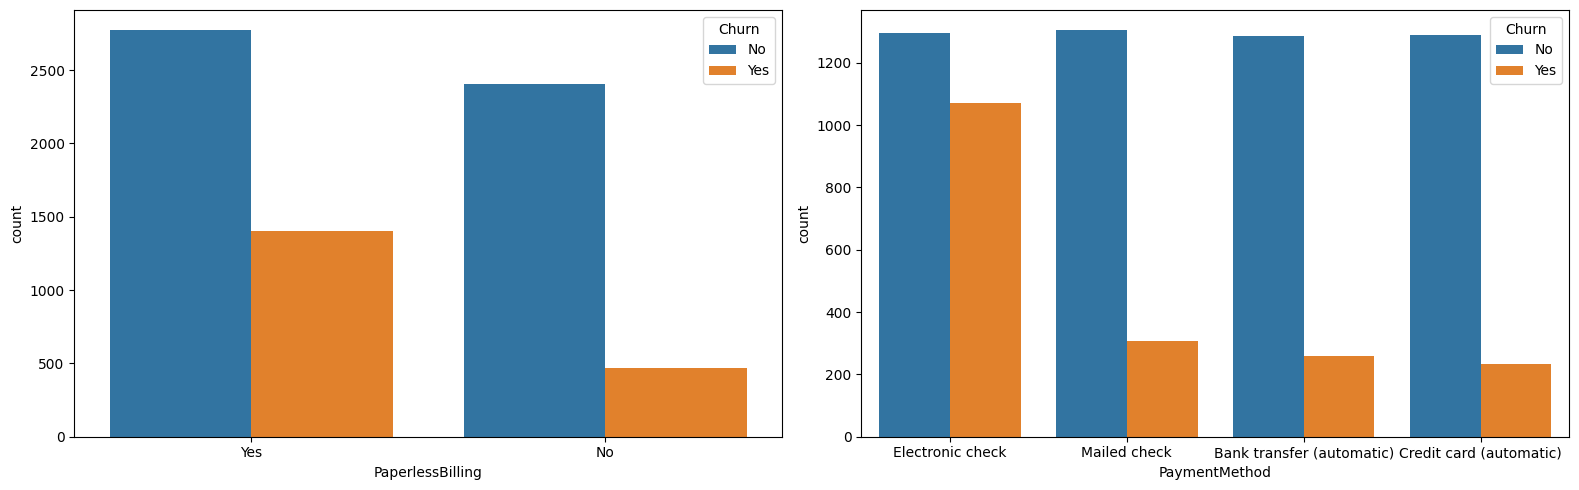

In [11]:
fig,axis = plt.subplots(1,2, figsize=(16, 5))
sns.countplot(ax = axis[0], data=df, x="PaperlessBilling", hue="Churn")
sns.countplot(ax=axis[1], data=df, x="PaymentMethod", hue="Churn")
plt.tight_layout()
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

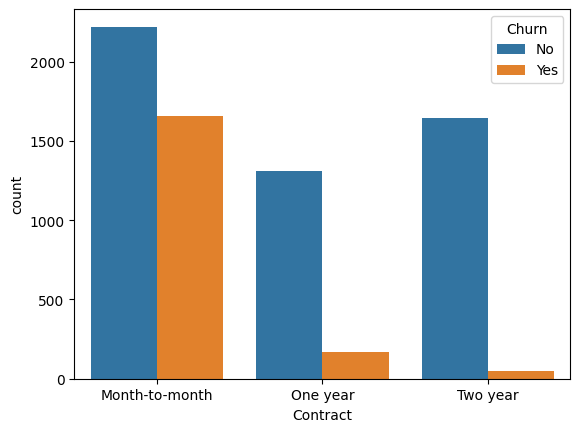

In [12]:
sns.countplot(data=df, x="Contract", hue="Churn")

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

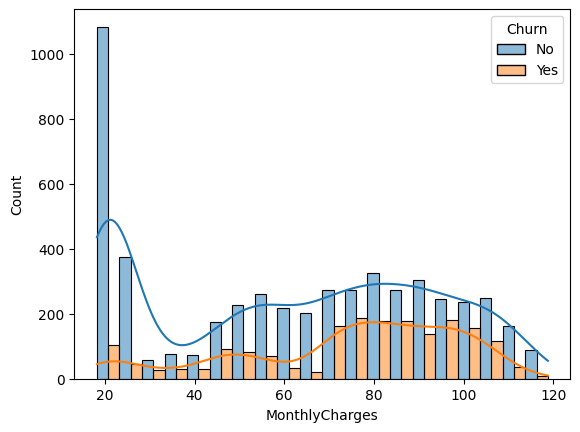

In [13]:
import seaborn as sns
sns.histplot(
    data = df,
    x='MonthlyCharges',
    hue = 'Churn',
    bins = 20,
    multiple = 'dodge',
    kde = True
)

<Axes: xlabel='TotalCharges', ylabel='Count'>

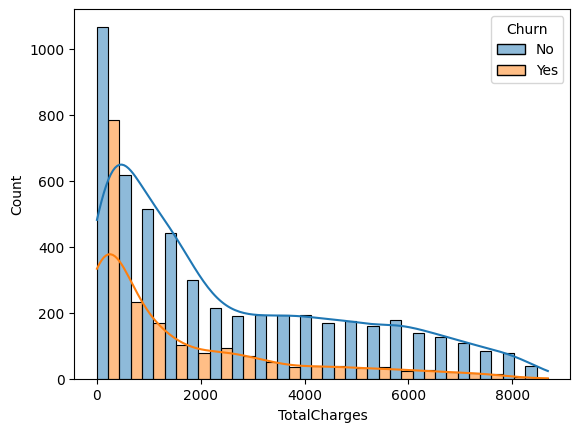

In [14]:
import seaborn as sns
sns.histplot(
    data = df,
    x='TotalCharges',
    hue = 'Churn',
    bins = 20,
    multiple = 'dodge',
    kde =True
)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

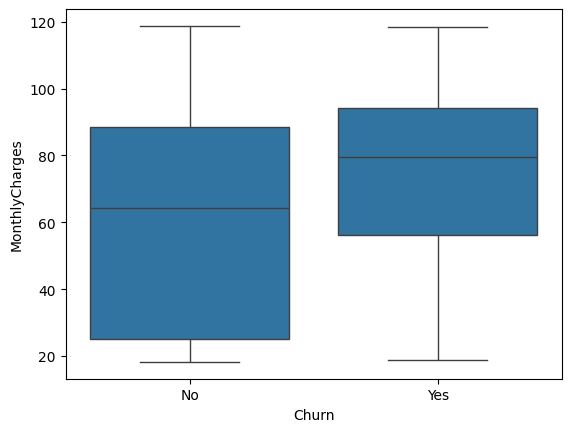

In [15]:
sns.boxplot(
    data = df,
    x='Churn',
    y='MonthlyCharges',
)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

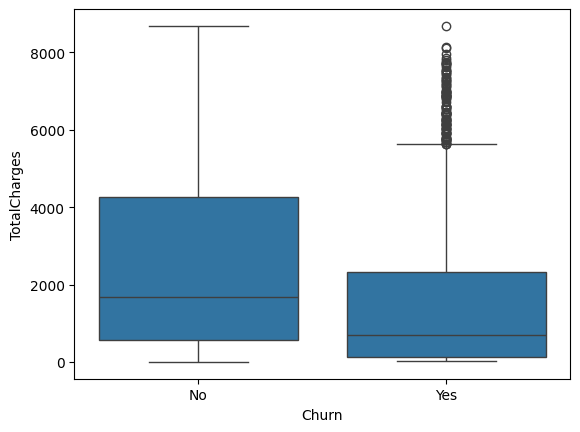

In [16]:
sns.boxplot(
    data = df,
    x='Churn',
    y='TotalCharges',
)

# From the above plots we found that streaming movies/tv and multiple lines has very less impact on churn  

In [17]:
df2 = df.drop(['StreamingMovies', 'StreamingTV', 'MultipleLines'], axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = [ 
    'Contract',  
    'Churn'
]

for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [19]:
df2['Contract'].value_counts()

Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [20]:
binary_cols = [
    "gender", "Partner", "Dependents",
    "PhoneService", "PaperlessBilling"
]

In [21]:
df2[binary_cols] = df2[binary_cols].replace({
    "Yes": 1,
    "No": 0,
    "Female": 1,
    "Male": 0
})

/var/folders/sg/4rnv364n367_p_xjn0yynwzr0000gn/T/ipykernel_95915/2685423554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[binary_cols] = df2[binary_cols].replace({


In [22]:
cat_cols = [
    "InternetService",
    "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "Contract", "PaymentMethod"
]

In [23]:
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Inte

In [25]:
bool_cols = df2.select_dtypes(include="bool").columns
df2[bool_cols] = df2[bool_cols].astype(int)

In [26]:
df2 = df2.drop(['customerID'], axis=1)

In [27]:
services = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["num_services"] = df[services].apply(lambda x: (x=="Yes").sum(), axis=1)
df2['num_services'] = df['num_services']

In [28]:
df2['num_services'].head()

0    1
1    2
2    2
3    3
4    0
Name: num_services, dtype: int64

In [29]:
df2["loyalty_score"] = df2["tenure"] / df2["tenure"].max()


In [30]:
df2["tenure_x_monthly"] = df2["tenure"] * df2["MonthlyCharges"]
df2["services_x_charge"] = df2["num_services"] * df2["MonthlyCharges"]


<Axes: >

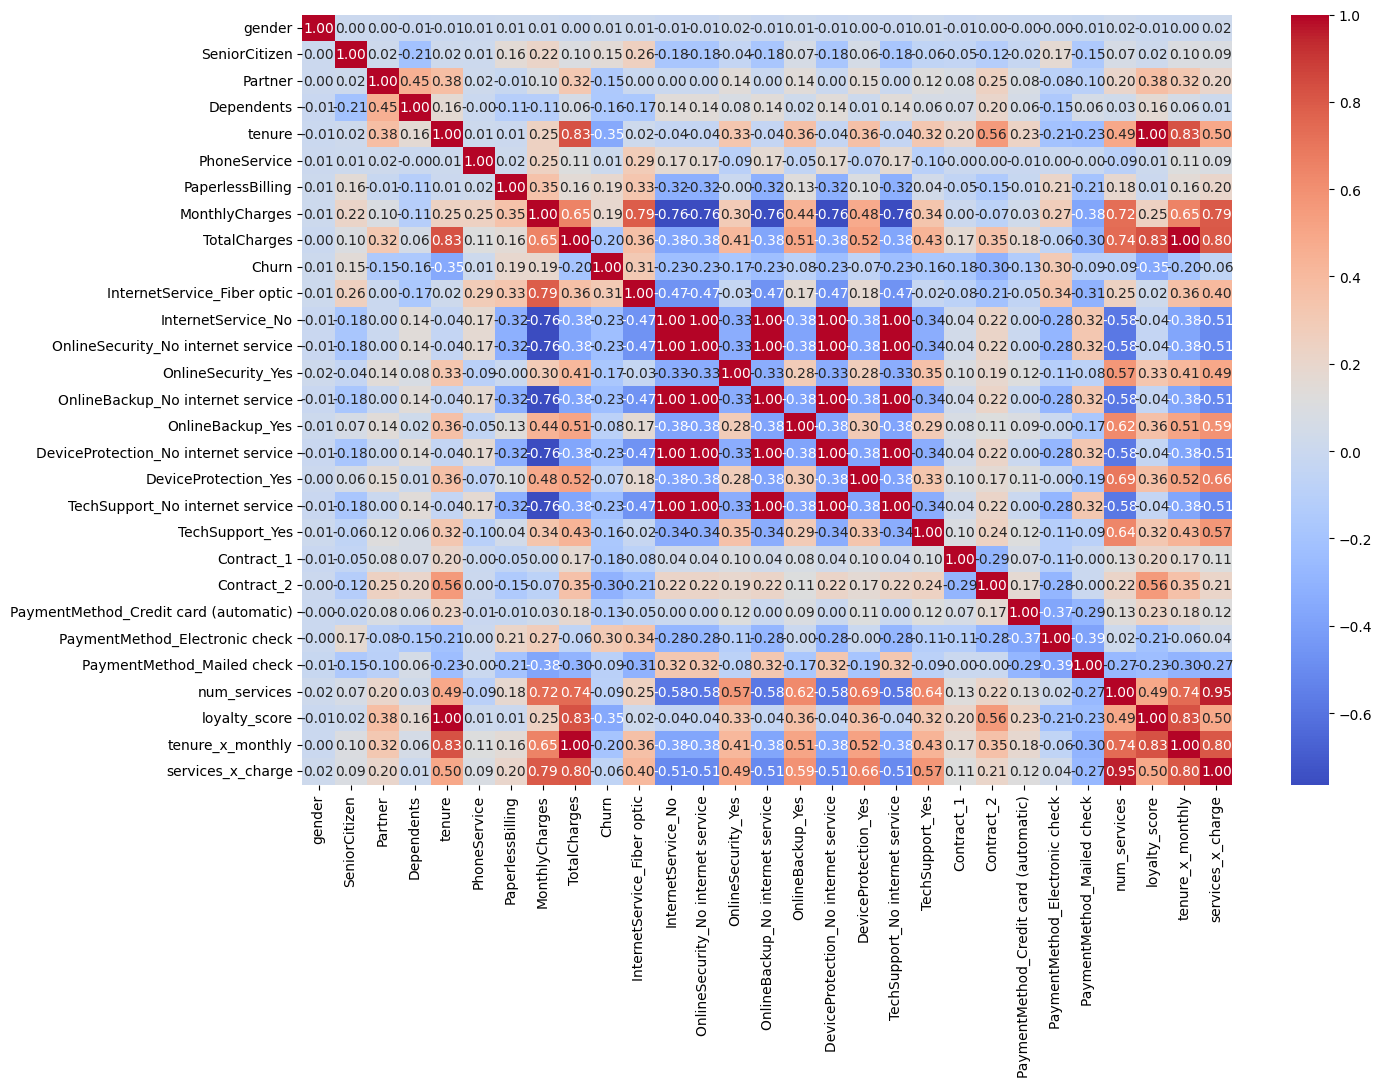

In [31]:
correlation = df2.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

In [32]:
from sklearn.model_selection import train_test_split
X = df2.drop(['Churn'], axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Logistic Regresssion model with scores

In [35]:
model = LogisticRegression()

model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Precision:  0.6506410256410257
Recall:  0.5427807486631016
F1 score:  0.5918367346938775
Accuracy:  0.801277501774308
CM:  [[926 109]
 [171 203]]


# K Nearest Classifier and its scores

In [37]:
model2 = KNeighborsClassifier()
model2.fit(X_train_s, y_train)
y_pred2 = model2.predict(X_test_s)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred2))
print("Recall: ", recall_score(y_test, y_pred2))
print("F1 score: ", f1_score(y_test, y_pred2))
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("CM: ", confusion_matrix(y_test, y_pred2))

Precision:  0.5512048192771084
Recall:  0.4893048128342246
F1 score:  0.5184135977337111
Accuracy:  0.758694109297374
CM:  [[886 149]
 [191 183]]


# Naive Bayes model and its scores

In [39]:
model3 = GaussianNB()
model3.fit(X_train_s, y_train)

y_pred3 = model3.predict(X_test_s)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred3))
print("Recall: ", recall_score(y_test, y_pred3))
print("F1 score: ", f1_score(y_test, y_pred3))
print("Accuracy: ", accuracy_score(y_test, y_pred3))
print("CM: ", confusion_matrix(y_test, y_pred3))

Naive Bayes Model
Precision:  0.45375722543352603
Recall:  0.839572192513369
F1 score:  0.5891181988742964
Accuracy:  0.6891412349183819
CM:  [[657 378]
 [ 60 314]]


# Decision Trees

In [40]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)  
clf.fit(X_train_s, y_train)
y_pred4 = clf.predict(X_test_s)

print("Decision Tree Model")
print("Precision: ", precision_score(y_test, y_pred4))
print("Recall: ", recall_score(y_test, y_pred4))
print("F1 score: ", f1_score(y_test, y_pred4))
print("Accuracy: ", accuracy_score(y_test, y_pred4))
print("CM: ", confusion_matrix(y_test, y_pred4))

Decision Tree Model
Precision:  0.6018808777429467
Recall:  0.5133689839572193
F1 score:  0.5541125541125541
Accuracy:  0.7806955287437899
CM:  [[908 127]
 [182 192]]


# Random Forest

In [41]:
clf2 = RandomForestClassifier(
    n_estimators=91,
    max_depth=8,
    min_samples_split=10,
    class_weight="balanced"
)
clf2.fit(X_train_s, y_train)
y_pred5 = clf2.predict(X_test_s)

print("Random Forest")
print("Precision: ", precision_score(y_test, y_pred5))
print("Recall: ", recall_score(y_test, y_pred5))
print("F1 score: ", f1_score(y_test, y_pred5))
print("Accuracy: ", accuracy_score(y_test, y_pred5))
print("CM: ", confusion_matrix(y_test, y_pred5))

Random Forest
Precision:  0.540796963946869
Recall:  0.7620320855614974
F1 score:  0.632630410654828
Accuracy:  0.7650816181689141
CM:  [[793 242]
 [ 89 285]]


# Logistic Regression achieved the highest accuracy (80.3%), while Random Forest delivered the best F1-score (0.63) and recall (78%), making it most effective for identifying potential churn customers. Model performance was validated using precision, recall, F1-score, accuracy, and confusion matrix analysis.